<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calculating-the-Accuracy-of-the-Model" data-toc-modified-id="Calculating-the-Accuracy-of-the-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculating the Accuracy of the Model</a></span><ul class="toc-item"><li><span><a href="#Import-the-relevant-libraries" data-toc-modified-id="Import-the-relevant-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import the relevant libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the data</a></span><ul class="toc-item"><li><span><a href="#Declare-the-dependent-and-independent-variables" data-toc-modified-id="Declare-the-dependent-and-independent-variables-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Declare the dependent and independent variables</a></span></li><li><span><a href="#Simple-Logistic-Regression" data-toc-modified-id="Simple-Logistic-Regression-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Simple Logistic Regression</a></span></li></ul></li><li><span><a href="#Expand-the-model" data-toc-modified-id="Expand-the-model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Expand the model</a></span><ul class="toc-item"><li><span><a href="#Declare-the-independent-variable(s)" data-toc-modified-id="Declare-the-independent-variable(s)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Declare the independent variable(s)</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></li></ul></li><li><span><a href="#confusion-matrix-using-sklearn" data-toc-modified-id="confusion-matrix-using-sklearn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>confusion matrix using sklearn</a></span></li><li><span><a href="#confusion-matrix-using-pandas" data-toc-modified-id="confusion-matrix-using-pandas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>confusion matrix using pandas</a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Accuracy</a></span></li></ul></div>

# Calculating the Accuracy of the Model

Using the same dataset, expand the model by including all other features into the regression. 

Moreover, calculate the accuracy of the model and create a confusion matrix

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import sklearn

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
sns.set()

# seaborn warnings ignore
import warnings
warnings.filterwarnings('ignore')

# Jupyter notebook settings for pandas
pd.set_option('display.float_format', '{:,.2f}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 100)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
!ls ../data/csv

Bank-data.csv                        real_estate_price_size.csv           real_estate_price_size_year_view.csv
Example-bank-data.csv                real_estate_price_size_year.csv


In [3]:
df = pd.read_csv('../data/csv/Bank-data.csv',index_col=0)
df.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.33,0.00,1.00,0.00,0.00,117.00,no
1,0.77,0.00,0.00,2.00,1.00,274.00,yes
2,4.86,0.00,1.00,0.00,0.00,167.00,no
3,4.12,0.00,0.00,0.00,0.00,686.00,yes
4,4.86,0.00,1.00,0.00,0.00,157.00,no


In [4]:
df['y'] = df['y'].map({'yes':1,'no':0})
df.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.33,0.00,1.00,0.00,0.00,117.00,0
1,0.77,0.00,0.00,2.00,1.00,274.00,1
2,4.86,0.00,1.00,0.00,0.00,167.00,0
3,4.12,0.00,0.00,0.00,0.00,686.00,1
4,4.86,0.00,1.00,0.00,0.00,157.00,0


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [5]:
y = df['y']
x1 = df['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [6]:
x = sm.add_constant(x1)
results = sm.Logit(y,x).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Dec 2018   Pseudo R-squ.:                  0.2121
Time:                        11:25:42   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

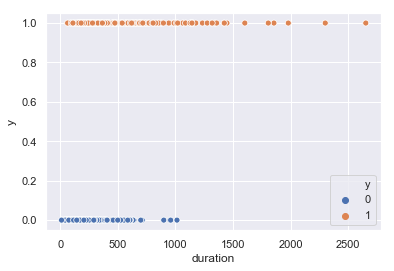

In [7]:
sns.scatterplot(data=df, x='duration',y='y',hue='y');

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [8]:
df.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.33,0.00,1.00,0.00,0.00,117.00,0
1,0.77,0.00,0.00,2.00,1.00,274.00,1
2,4.86,0.00,1.00,0.00,0.00,167.00,0
3,4.12,0.00,0.00,0.00,0.00,686.00,1
4,4.86,0.00,1.00,0.00,0.00,157.00,0


In [9]:
X = df[['interest_rate','march','credit','previous','duration']]
y = df['y']

results = sm.Logit(y,X).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.336668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      513
Method:                           MLE   Df Model:                            4
Date:                Thu, 27 Dec 2018   Pseudo R-squ.:                  0.5143
Time:                        11:25:42   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 1.185e-78
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
interest_rate    -0.8030      0.079    -10.201      0.000      -0.957      -0.649
march            -1.8387      0.315     -5.831      0.000      -2.457      -1.221
credit            2.3459      1.071      2.190      0.029       0.246       4.445
previous          1.5262      0.478      3.190      0.001       0.588       2.464
duration          0.0069      0.001     10.365      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Create the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [10]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        
        # Specify the bins 
        bins=np.array([0,0.5,1])
        
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        
        # Return the confusion matrix and accuracy
        return cm, accuracy

In [11]:
confusion_matrix(X,y,results)

(array([[218.,  41.],
        [ 28., 231.]]), 0.8667953667953668)

# confusion matrix using sklearn

In [12]:
from sklearn.metrics import confusion_matrix

y_true = df['y'].values.ravel()
y_pred = results.predict(X).ravel()
y_pred = [1 if i >= 0.5 else 0 for i in y_pred]

confusion_matrix(y_true, y_pred)

array([[218,  41],
       [ 28, 231]])

In [13]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(218, 41, 28, 231)

# confusion matrix using pandas

In [14]:
import pandas as pd

# for logistic regression
y_pred = [1 if i >= 0.5 else 0 for i in results.predict(X).ravel()]

y_actu = pd.Series(df['y'], name='Actual')
y_pred = pd.Series( y_pred, name='Predicted')
df_confusion=pd.crosstab(y_actu, y_pred)

df_confusion

Predicted,0,1
Actual,,
0,218,41
1,28,231


# Accuracy

In [15]:
accuracy = np.sum(y_true == y_pred)/ len(y_true)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 86.68%
